In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
import pandas as pd
import collections
import json

import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud

In [ ]:
data = pd.read_csv("prep.csv", index_col=0)
#data = data[["0", "clean"]]
data = data.rename(columns={"0":"y", "1":"raw"})

In [ ]:
data

,y,raw,clean
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ..."
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...
...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...


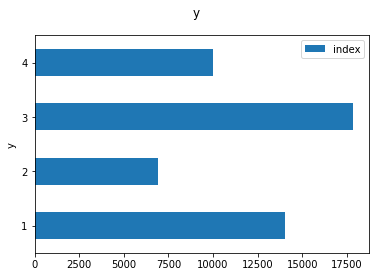

In [ ]:
fig, ax = plt.subplots()
fig.suptitle("y")
data["y"].reset_index().groupby("y").count().plot(kind="barh", ax=ax)

In [ ]:
import spacy

ner = spacy.load("en_core_web_lg")

data["tags"] = data["raw"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )

In [ ]:
def lst_count(lst):
    counter = collections.Counter()
    for x in lst:
        counter[x] += 1
    counter = collections.OrderedDict( 
                     sorted(counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in counter.items() ]
    return lst_count

In [ ]:
data["tags"] = data["tags"].apply(lambda x: lst_count(x))

In [ ]:
def ner_features(lst_tuple_count, tag):
    if len(lst_tuple_count) > 0:
        tag_type = []
        for tuple_count in lst_tuple_count:
            for tuple in tuple_count:
                type, n = tuple[1], tuple_count[tuple]
                tag_type = tag_type + [type]*n
                counter = collections.Counter()
                for x in tag_type:
                    counter[x] += 1
        return counter[tag]
    else:
        return 0

In [ ]:
tags_set = []
for lst in data["tags"].tolist():
     for counter in lst:
          for k in counter.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     data["tags_"+feature] = data["tags"].apply(lambda x: 
                             ner_features(x, feature))

In [ ]:
data

,y,raw,clean,token_count,sentiment,tags,tags_FAC,tags_WORK_OF_ART,tags_ORG,tags_PERSON,...,tags_MONEY,tags_DATE,tags_GPE,tags_NORP,tags_LOC,tags_LAW,tags_TIME,tags_EVENT,tags_PRODUCT,tags_CARDINAL
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ...",109,0.099259,"[{('NHL', 'ORG'): 2}, {('every night', 'TIME')...",0,0,4,4,...,0,3,0,0,0,0,1,1,0,1
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...,87,0.024242,"[{('HBO', 'ORG'): 1}, {('10 million', 'CARDINA...",0,0,2,2,...,0,4,0,0,0,0,1,0,0,1
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...,565,0.049670,"[{('Amarillo', 'GPE'): 3}, {('6 p.m.', 'TIME')...",2,1,13,15,...,0,3,8,0,0,0,16,0,0,11
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...,473,0.195087,"[{('O'Connor', 'PERSON'): 9}, {('Hyams', 'PERS...",1,1,2,22,...,2,4,0,0,0,0,2,0,1,1
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...,142,0.126438,"[{('Seattle Mariners', 'ORG'): 1}, {('the San ...",0,0,5,7,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...,409,0.046296,"[{('Soong', 'PERSON'): 20}, {('KMT', 'ORG'): 1...",0,0,21,39,...,1,18,5,0,0,0,0,0,0,2
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...,175,0.055816,"[{('Taipei city', 'GPE'): 1}, {('30 years or m...",0,0,1,0,...,0,2,3,0,0,0,0,0,0,0
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...,294,0.103434,"[{('Taiwan', 'GPE'): 12}, {('Japan', 'GPE'): 9...",5,0,2,9,...,0,10,31,3,3,0,0,1,0,4
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...,132,-0.120455,"[{('four', 'CARDINAL'): 1}, {('National Freewa...",2,0,0,0,...,0,2,0,0,0,0,0,0,0,3


In [ ]:
for head in data.columns.values:
  print(head, (data[head] == 0).sum())

y 0
raw 0
clean 0
token_count 0
sentiment 2969
tags 0
tags_FAC 38584
tags_WORK_OF_ART 36292
tags_ORG 6755
tags_PERSON 5021
tags_LANGUAGE 47420
tags_QUANTITY 42465
tags_ORDINAL 28517
tags_PERCENT 39997
tags_MONEY 37506
tags_DATE 7652
tags_GPE 13525
tags_NORP 22468
tags_LOC 35167
tags_LAW 42967
tags_TIME 34048
tags_EVENT 40559
tags_PRODUCT 40248
tags_CARDINAL 14131


In [ ]:
data.columns.values

array(['y', 'raw', 'clean', 'token_count', 'sentiment', 'tags',
       'tags_FAC', 'tags_WORK_OF_ART', 'tags_ORG', 'tags_PERSON',
       'tags_LANGUAGE', 'tags_QUANTITY', 'tags_ORDINAL', 'tags_PERCENT',
       'tags_MONEY', 'tags_DATE', 'tags_GPE', 'tags_NORP', 'tags_LOC',
       'tags_LAW', 'tags_TIME', 'tags_EVENT', 'tags_PRODUCT',
       'tags_CARDINAL'], dtype=object)

In [ ]:
data2 = data[['y', 'raw', 'clean', 'tags_ORG', 'tags_PERSON',
       'tags_ORDINAL','tags_DATE', 'tags_GPE', 'tags_NORP', 'tags_LOC',
       'tags_TIME',
       'tags_CARDINAL']]

In [ ]:
data2

,y,raw,clean,tags_ORG,tags_PERSON,tags_ORDINAL,tags_DATE,tags_GPE,tags_NORP,tags_LOC,tags_TIME,tags_CARDINAL
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ...",4,4,0,3,0,0,0,1,1
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...,2,2,0,4,0,0,0,1,1
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...,13,15,1,3,8,0,0,16,11
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...,2,22,1,4,0,0,0,2,1
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...,5,7,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...,21,39,0,18,5,0,0,0,2
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...,1,0,0,2,3,0,0,0,0
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...,2,9,0,10,31,3,3,0,4
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...,0,0,1,2,0,0,0,0,3


In [ ]:
data3 = pd.read_csv("prep.csv", index_col=0)

In [ ]:
from textblob import TextBlob

def length_features(df):
	df['word_count'] = df["clean"].apply(lambda x: len(str(x).split(" ")))
	df['char_count'] = df["clean"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
	df['sentence_count'] = df["clean"].apply(lambda x: len(str(x).split(".")))
	df['avg_word_length'] = df['char_count'] / df['word_count']
	df['avg_sentence_length'] = df['word_count'] / df['sentence_count']
	df['unique_word_count'] = df["clean"].apply(lambda x: len(set(str(x).split(" "))))
	df['unique_total_ratio'] = df['unique_word_count'] / df['word_count']


def sentiment(df):
	df["sentiment"] = df['clean'].apply(lambda x: 
                   TextBlob(x).sentiment.polarity)

In [ ]:
length_features(data3)

In [ ]:
sentiment(data3)

In [ ]:
data3

,0,1,clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_total_ratio,sentiment
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ...",109,528,9,4.844037,12.111111,89,0.816514,0.099259
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...,87,408,5,4.689655,17.400000,71,0.816092,0.024242
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...,565,2649,40,4.688496,14.125000,345,0.610619,0.049670
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...,473,2073,28,4.382664,16.892857,307,0.649049,0.195087
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...,142,614,6,4.323944,23.666667,107,0.753521,0.126438
...,...,...,...,...,...,...,...,...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...,409,1860,26,4.547677,15.730769,215,0.525672,0.046296
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...,175,879,11,5.022857,15.909091,121,0.691429,0.055816
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...,294,1522,13,5.176871,22.615385,174,0.591837,0.103434
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...,132,657,13,4.977273,10.153846,96,0.727273,-0.120455


In [ ]:
data2

,y,raw,clean,tags_ORG,tags_PERSON,tags_ORDINAL,tags_DATE,tags_GPE,tags_NORP,tags_LOC,tags_TIME,tags_CARDINAL
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ...",4,4,0,3,0,0,0,1,1
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...,2,2,0,4,0,0,0,1,1
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...,13,15,1,3,8,0,0,16,11
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...,2,22,1,4,0,0,0,2,1
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...,5,7,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...,21,39,0,18,5,0,0,0,2
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...,1,0,0,2,3,0,0,0,0
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...,2,9,0,10,31,3,3,0,4
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...,0,0,1,2,0,0,0,0,3


In [ ]:
data4 = pd.concat([data3, data2[['tags_ORG', 'tags_PERSON',
       'tags_ORDINAL','tags_DATE', 'tags_GPE', 'tags_NORP', 'tags_LOC',
       'tags_TIME',
       'tags_CARDINAL']]], axis=1)

In [ ]:
data4

,0,1,clean,word_count,char_count,sentence_count,avg_word_length,avg_sentence_length,unique_word_count,unique_total_ratio,sentiment,tags_ORG,tags_PERSON,tags_ORDINAL,tags_DATE,tags_GPE,tags_NORP,tags_LOC,tags_TIME,tags_CARDINAL
0,1,"A little less than a decade ago, hockey fans w...","littl less decad ago , hockey fan bless slate ...",109,528,9,4.844037,12.111111,89,0.816514,0.099259,4,4,0,3,0,0,0,1,1
1,1,The writers of the HBO series The Sopranos too...,writer hbo seri soprano took anoth dare storyt...,87,408,5,4.689655,17.400000,71,0.816092,0.024242,2,2,0,4,0,0,0,1,1
2,1,Despite claims from the TV news outlet to offe...,despit claim tv news outlet offer 'nonstop new...,565,2649,40,4.688496,14.125000,345,0.610619,0.049670,13,15,1,3,8,0,0,16,11
3,1,After receiving 'subpar' service and experienc...,receiv 'subpar ' servic experienc unusu long w...,473,2073,28,4.382664,16.892857,307,0.649049,0.195087,2,22,1,4,0,0,0,2,1
4,1,After watching his beloved Seattle Mariners pr...,watch belov seattl marin prevail san diego pad...,142,614,6,4.323944,23.666667,107,0.753521,0.126438,5,7,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48849,4,The ruling Kuomintang (KMT) has claimed owners...,rule kuomintang ( kmt ) claim ownership slush ...,409,1860,26,4.547677,15.730769,215,0.525672,0.046296,21,39,0,18,5,0,0,0,2
48850,4,The Taipei city government has encouraged the ...,taipei citi govern encourag rebuild low mid ri...,175,879,11,5.022857,15.909091,121,0.691429,0.055816,1,0,0,2,3,0,0,0,0
48851,4,President Ma Ying-jeou said Friday that a park...,presid ying jeou said friday park built commem...,294,1522,13,5.176871,22.615385,174,0.591837,0.103434,2,9,0,10,31,3,3,0,4
48852,4,The families of the four people who were kille...,famili four peopl kill landslid nation freeway...,132,657,13,4.977273,10.153846,96,0.727273,-0.120455,0,0,1,2,0,0,0,0,3


In [ ]:
data4.to_csv("concat.csv")

In [ ]:
files.download("concat.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>